<a href="https://colab.research.google.com/github/khalilullahalfaath/case_based_2_ML/blob/main/Copy_of_Case_Based_2_ML_1301204376.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library yang dibutuhkan

In [ ]:
# Ini adalah libraries yang umum digunakan untuk pre-processing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

In [ ]:
df = pd.read_csv("https://github.com/khalilullahalfaath/case_based_2_ML/blob/015db555032b29270d780ae9d0830d3168882aad/Country-data.csv?raw=true")

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Informasi terkait dataset di file data-dictionary.csv
1.   country:	Nama negara
2.   child_mort: Kematian anak di bawah umur 5 tahun setiap 1000 kelahiran
3.   exports: Jumlah eksport barang dan servis percapita. Diberikan sebagai persentase dari GDP perkapita
4. health:	Jumlah pengeluaran untuk biaya kesehatan perkapita. Diberikan sebagai persentase GDP perkapita
5. imports: Jumlah import barang dan servis perkapita. Diberikan sebagai persentase GDP perkapita
6. Income: Pendapatan bersih perorang
7. Inflation	Pengukuran dari pertambahan jumlah GDP pertahun
8. life_expec: Rata-rata jumlah tahun dari anak yang belum lahir akan hidup jika pola mortalitas tetap sama
9. total_fer:	Banyak anak yang akan lahir untuk setiap wanita jika age-fertility sekarang masih sama
10. gdpp:	GDP perkapita. Dihitung dari total GDP dan dibagi dengan banyaknya populasi

# EDA (Exploratory Data Analysis)

Exploratory Data Analysis adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. Dengan melakukan EDA, pengguna akan sangat terbantu dalam mendeteksi kesalahan dari awal, dapat mengidentifikasi outlier, mengetahui hubungan antar data serta dapat menggali faktor-faktor penting dari data. Proses EDA ini sangat bermanfaat dalam proses analisis statistik.

Dengan demikian tidak heran jika para praktisi data profesional sudah sangat sering menggunakan EDA agar hasil analisis menjadi lebih valid dan relevan dengan tujuan bisnis. Secara umum terdapat beberapa teknik exploratory data analysis yaitu dengan menggunakan statistik deskriptif, univariat analysis, dan multivariat analysis. (Sumber: https://www.dqlab.id/data-analisis-machine-learning-untuk-proses-pengolahan-data)

## Dimensi dataset

In [ ]:
N, K = df.shape
print("Jumlah baris = ",N)
print("Jumlah kolom = ",K)

Jumlah baris =  167
Jumlah kolom =  10


## 3 data pertama

In [ ]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


## 3 data terakhir

In [ ]:
df.tail(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.1,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.0,52.0,5.40,1460


## 3 Data sample

In [ ]:
df.sample(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.50,12000
104,Montenegro,6.8,37.0,9.11,62.7,14000,1.60,76.4,1.77,6680
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500


## Informasi terkait dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Dapat dilihat bahwa hanya country yang bertipe object atau string. Sedangkan yang lain bertipe data numerik, baik itu float maupun integer.


## Informasi terkait dataset secara deskriptif

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Preprocessing

In [ ]:
col_num = list(df.columns)
print(col_num)
col_num.pop(0)
print(col_num)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


## Mengecek duplikasi data

In [ ]:
bool_series = df.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool


In [ ]:
print(type(bool_series))
bool_series.value_counts()

<class 'pandas.core.series.Series'>


False    167
dtype: int64

Tidak ada duplikasi pada record data

## Handling missing values

In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Karena tidak ada missing values, maka tidak perlu dilakukan handling

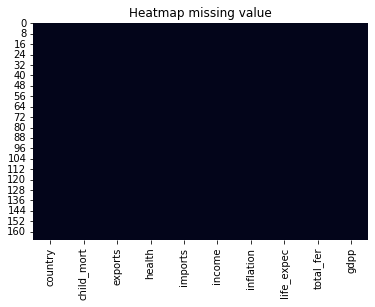

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.title("Heatmap missing value")
plt.show()

## Menghitung Outlier

In [ ]:
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

for i in col_num:
  outliers = hitungOutliers(df[i])
  percentage = len(outliers)/len(df[i])*100
  print(i)
  print("number of outliers: " + str(len(outliers)))
  print("max outlier value: " + str(outliers.max()))
  print("min outlier value: " + str(outliers.min()))
  print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")
  print()

child_mort
number of outliers: 4
max outlier value: 208.0
min outlier value: 149.0
Outliers percentage: 2.4%

exports
number of outliers: 5
max outlier value: 200.0
min outlier value: 93.8
Outliers percentage: 2.99%

health
number of outliers: 2
max outlier value: 17.9
min outlier value: 14.2
Outliers percentage: 1.2%

imports
number of outliers: 4
max outlier value: 174.0
min outlier value: 108.0
Outliers percentage: 2.4%

income
number of outliers: 8
max outlier value: 125000
min outlier value: 55500
Outliers percentage: 4.79%

inflation
number of outliers: 5
max outlier value: 104.0
min outlier value: 24.9
Outliers percentage: 2.99%

life_expec
number of outliers: 3
max outlier value: 47.5
min outlier value: 32.1
Outliers percentage: 1.8%

total_fer
number of outliers: 1
max outlier value: 7.49
min outlier value: 7.49
Outliers percentage: 0.6%

gdpp
number of outliers: 25
max outlier value: 105000
min outlier value: 33700
Outliers percentage: 14.97%



Dapat dilihat bahwa outlier pada masing-masing kolom kurang dari 10% kecuali untuk gdpp. Yang mana itu adalah hal yang wajar karena GDPP antara negara maju dan negara terbelakang sangat jauh.

# Visualisasi

## Persebaran data



```
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

-------
sns.kdeplot(df['sepal_width'])
```



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

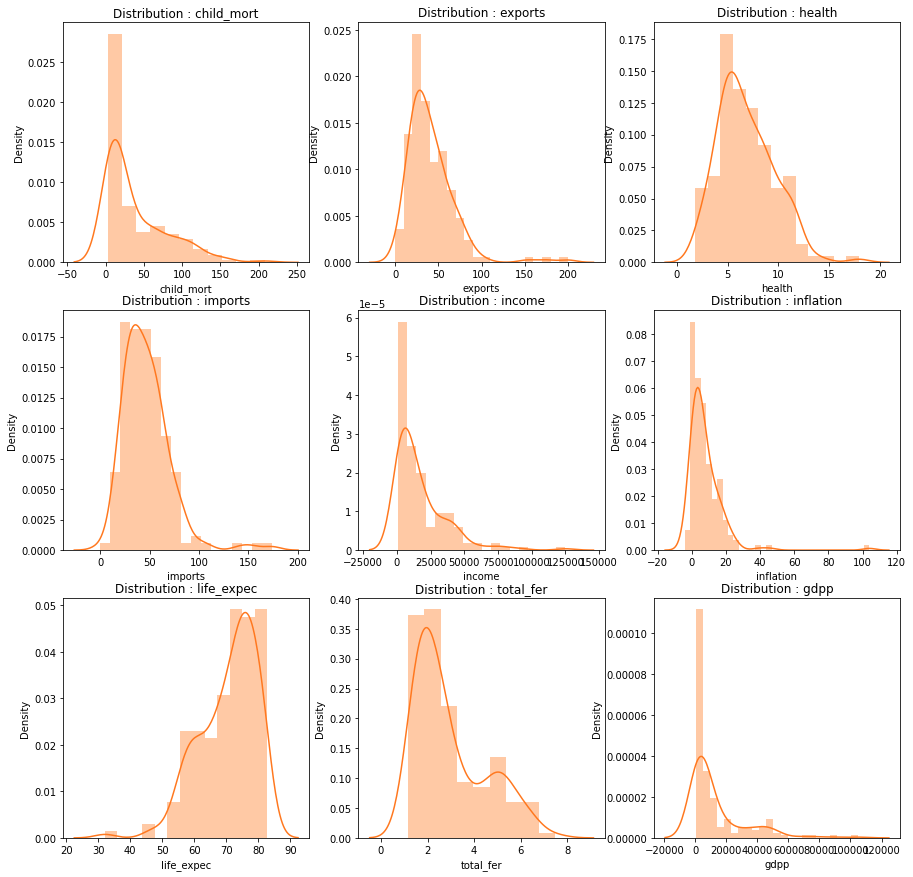

In [ ]:
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(col_num)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[col_num[i]],color = colors[0])
    title = 'Distribution : ' + col_num[i]
    plt.title(title)
plt.show()

## Korelasi antara Variabel


In [ ]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


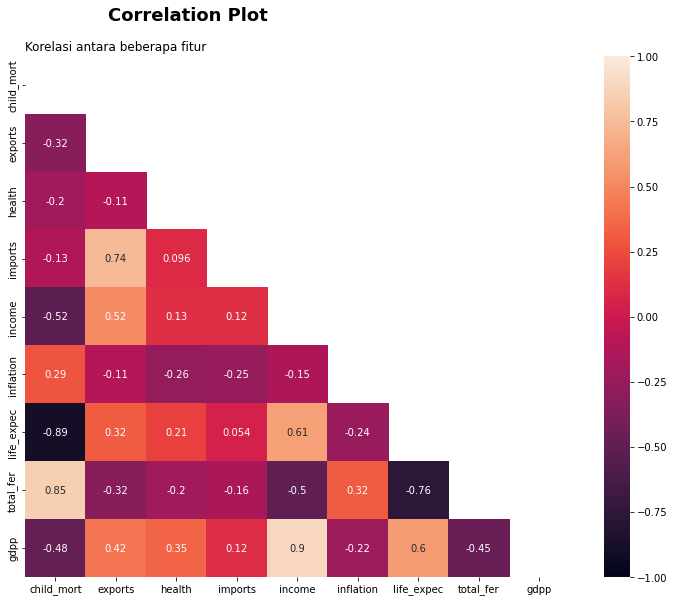

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=18, fontweight='bold')
plt.title("Korelasi antara beberapa fitur", loc='left', fontsize=12) 
plt.tight_layout()
plt.show()

### Menampilkan korelasi yang lebih dari sama dengan 0.5 dan kurang dari sama dengan 0.5

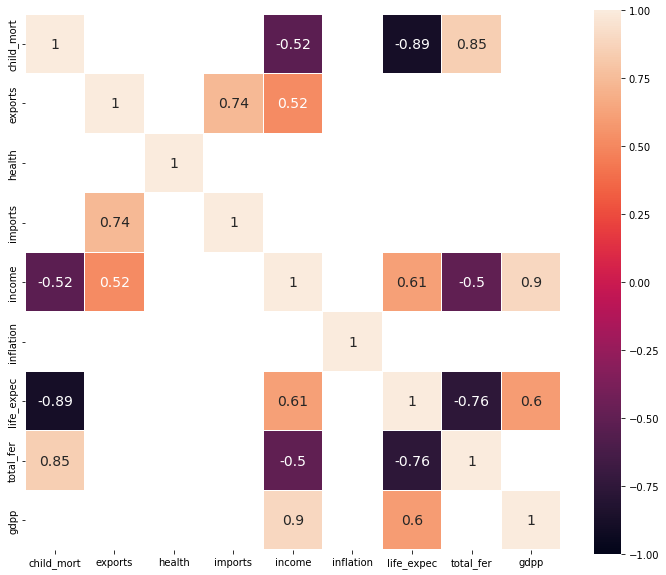

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)],vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True,
            annot_kws={"size":14},square=True)

## Boxplot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

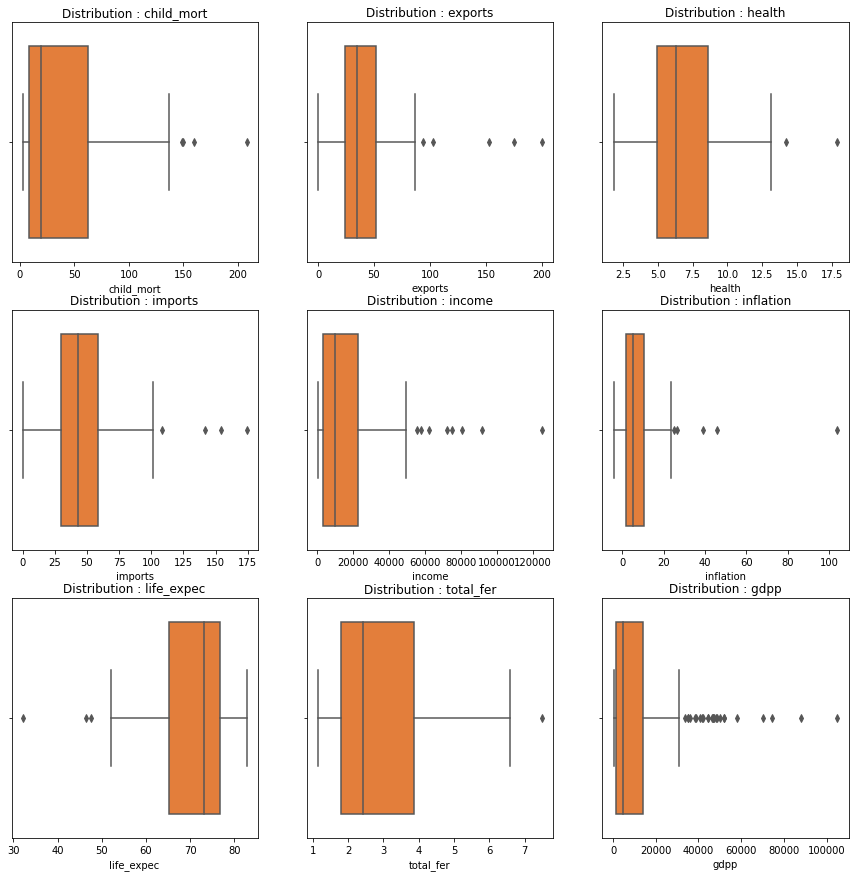

In [ ]:
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(col_num)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col_num[i]],color = colors[0])
    title = 'Distribution : ' + col_num[i]
    plt.title(title)
plt.show()

# Transformasi dataset

In [ ]:
df.shape

(167, 10)

In [ ]:
#normalisasi
def minMaxScaling(df) :
    return (df.iloc[:,1:10] - df.iloc[:,1:10].min()) / (df.iloc[:,1:10].max() - df.iloc[:,1:10].min())

In [ ]:
df_normalized = minMaxScaling(df)

In [ ]:
df_normalized

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299
